# Imports

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from os.path import exists, dirname
import os, sys
from NAP import *
try:
    sys.path.append(dirname('libs/dreem/dreem')) 
except:
    "If dreem isn't installed on your computer, the code won't run"

ModuleNotFoundError: No module named 'NAP'

# Data wrangling

### Resources used

In [2]:
# Files:
## New pickle files to process and to push to firebase
push_these_pickles_to_firebase_list = ['C5','C5_realignment_v3']#'C5_align_v2_0mut', 'C5_align_v2_1mut'] # PICKLES FILES TO PUSH TO THE FIREBASE HERE 
other_C5 = []# ['C5_q40', 'C5_bt2v2343','C5_bt2343_q40','C5_Harrish']

## Pickle files to load for this experiment
pickles = data_wrangler.generate_pickles(path_to_data='data/FULLSET',
                            letters_boundaries = ('A','H'),
                            number_boundaries= (1,0),
                            pickles_list= [] +other_C5 + push_these_pickles_to_firebase_list,
                            remove_pickles=['C3','C10','D10','E10','F10','G10','H10', 'E4'])

push_these_pickles_to_firebase = {k: v for k, v in pickles.items() if k in push_these_pickles_to_firebase_list}

## Data files paths
json_file = 'data/db.json'
RNAstructureFile = 'data/RNAstructureFile.csv'

## Constants
min_bases_cov = 1000 
username = 'Yves'

### Load the data

Process new pickle files and push them to Firebase

In [3]:
# If the user gives some new pickles files, push them to the firebase, then pull the entire firebase
if len(push_these_pickles_to_firebase):
    data_wrangler.push_pickles_to_firebase(pickles = push_these_pickles_to_firebase,
                                            RNAstructureFile = RNAstructureFile,
                                            min_bases_cov = min_bases_cov, 
                                            username=username)
    if exists(json_file):
        os.remove(json_file)

Push pickles to firebase!
C5 Re-used the previous firebase connection
C5_realignment_v3 Done!


In [4]:
# If not local copy of firebase, pull the firebase, else, load your copy
if not exists(json_file):
    if not exists('data'):
        os.mkdir('data')
    df_rough = data_wrangler.load_data_from_firebase(tubes = pickles.keys(), username=username)
    data_wrangler.dump_dict_json(JSONFileDict=json_file,
                                 df=df_rough)
else:
    df_rough = data_wrangler.load_dict_json(json_file)

No local file found, load data from Firebase
Re-used the previous firebase connection
C5 C5_realignment_v3 Done!
Dumping df as a dict to a JSON file data/db.json
Done!


### Clean and reformat the dataset. 
`df` is used for the analysis. Each of the construct have above 1000 reads for each tube.     
`df_full` is used for quality quality analysis. It has all constructs above 1000 valid reads for each tube individually.

In [15]:
df, df_full = turner_overthrow.clean_dataset(df_rough=df_rough,
                                             tubes=pickles.keys(), 
                                             min_bases_cov=min_bases_cov)


/home/ymdt/NAP/nap.py:105: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_full['tubes_covered'].loc[construct[1].index] = construct[1]['sequence'].count()


0 constructs were dropped because deltaG was 'void'
61 constructs have more than 1000 reads for each base of their var part on each tube


,tube,construct,cov_bases,cov_bases_sec_half,cov_bases_var,data_type,del_bases,end,full_deltaG,sequence,...,skips_low_mapq,skips_short_read,skips_too_many_muts,start,var_deltaG,var_end_index,var_sequence,var_start_index,var_structure_comparison,tubes_covered
0,C5,185,"[0.0, 21342.0, 21060.0, 21381.0, 21412.0, 2109...",11260.0,18902.0,DMS,"[0.0, 0.0, 0.0, 0.0, 0.0, 9.0, 0.0, 3.0, 0.0, ...",170,-63.0,GACGTTCCTGGATCCUUGCGAAACCAGUGAUCAUAUAUCUACAUCU...,...,11843,0,0,1,-23.2,114,UACAAAUCAGUGUAUAUAUGCCCCCAUAUAUACACUGAUUUGUA,70,00000000000000000000000000000000000000000000,2
1,C5,381,"[0.0, 17648.0, 17658.0, 17635.0, 17661.0, 1749...",21.0,14087.0,DMS,"[0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 2.0, 0.0, ...",170,-19.6,GACGTTCCTGGATCCAUUCGAUCCAAACACACCCACACUCACACAC...,...,19971,0,1,1,-1.9,103,GCUCGUGAGGAUCACCCAACCGC,80,00111001010000111100011,2
2,C5,597,"[0.0, 15087.0, 14820.0, 15072.0, 15135.0, 1433...",4184.0,11788.0,DMS,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 4.0, 0.0, ...",170,-39.7,GACGTTCCTGGATCCUGGUUUAUCUUGUCUCUUUCUCUUUCUCUUC...,...,4026,0,0,1,-28.2,120,CUGUAUAUAUCAUUCGUGAUAUAUACAGACUGUAUAUAUCAUUCGU...,63,0000000000001001111111111111111111111111110010...,2
3,C5,1055,"[0.0, 23577.0, 23497.0, 23340.0, 23603.0, 2215...",2590.0,18304.0,DMS,"[0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 1.0, 0.0, ...",170,-14.8,GACGTTCCTGGATCCUAUUUCAACUACUCCUUUUUCUCUUCCUCUU...,...,5937,0,3,1,-4.2,100,CAUUGUAUAUAUACAAUG,82,000000000000000000,2
4,C5,1092,"[0.0, 12855.0, 12846.0, 12849.0, 12857.0, 1260...",1144.0,8634.0,DMS,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",170,-15.2,GACGTTCCTGGATCCAUCUAAAUUUCCCUUUUUCUCUUCCUCUUUC...,...,16729,0,0,1,-2.4,103,GCAGUUGAGGAUCACCCCUAUGC,80,10011010001000001110011,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,C5_realignment_v3,11642,"[0.0, 8289.0, 8238.0, 8253.0, 8309.0, 8022.0, ...",1458.0,6559.0,DMS,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, ...",170,-22.3,GACGTTCCTGGATCCCUUGGUAAUAAAUUUUCUCUUCCUCUUUCUC...,...,268,0,9,1,-12.5,104,CUGUAUAUAUCCGAGGAUAUAUACAG,78,00000000000000000000000000,2
118,C5_realignment_v3,11825,"[0.0, 20402.0, 20274.0, 20393.0, 20455.0, 1989...",7892.0,13670.0,DMS,"[0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 2.0, 0.0, ...",170,-39.2,GACGTTCCTGGATCCUAUUUCGUUGUUUCCUCUUUCUCUUUCUCUU...,...,678,0,16,1,-29.1,112,CCACCUGUAUAUAUCAUGAUCAGUCAUGAUAUAUACAGGUGG,70,000000000000000000000000000000000000000000,2
119,C5_realignment_v3,12108,"[0.0, 44885.0, 44896.0, 44878.0, 44928.0, 4463...",813.0,12036.0,DMS,"[0.0, 0.0, 0.0, 0.0, 0.0, 6.0, 0.0, 4.0, 0.0, ...",170,-17.3,GACGTTCCTGGATCCCACACUAAGUUAUUCCUCUUUCUCUUUCUCU...,...,933,0,56,1,-7.9,111,UGUAUAAUAUACACAUGUAUAAUAUACACAUGUAUAAUAU,71,0000000000000000000000000000000000000000,2
120,C5_realignment_v3,12306,"[0.0, 51038.0, 50931.0, 51156.0, 51104.0, 5065...",12627.0,42658.0,DMS,"[0.0, 0.0, 0.0, 0.0, 0.0, 15.0, 0.0, 4.0, 0.0,...",170,-24.4,GACGTTCCTGGATCCUCAGUGAACCUACUUUUUCUCUUCCUCUUUC...,...,1302,0,136,1,-2.8,103,GCGAAUGAGGAUCACCCACGUGC,80,01011101001011111101001,2


# Data quality analysis

In [6]:
## Select - or not - to use this part
data_quality_analysis = True

### Show the tube's quantity of valid structures (good indicator of the tube's quality)

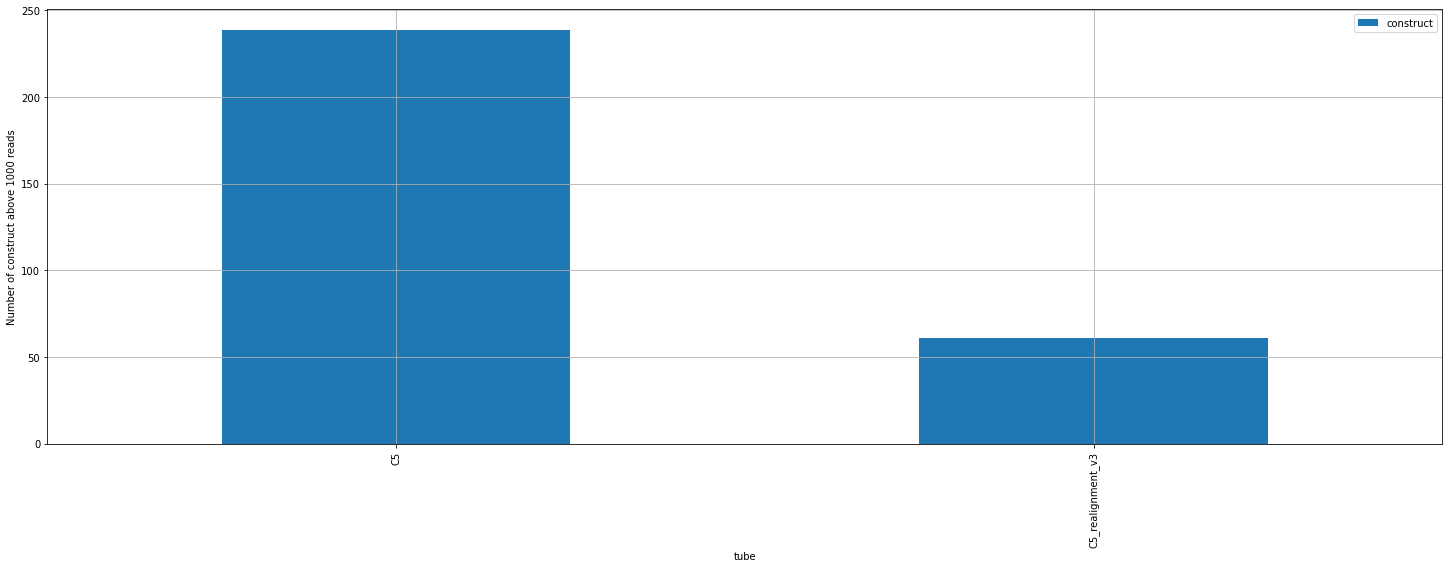

In [7]:
if data_quality_analysis:
    plot.valid_construct_per_tube(df=df_full,
                              min_bases_cov=min_bases_cov)

### Show the tube coverage distribution

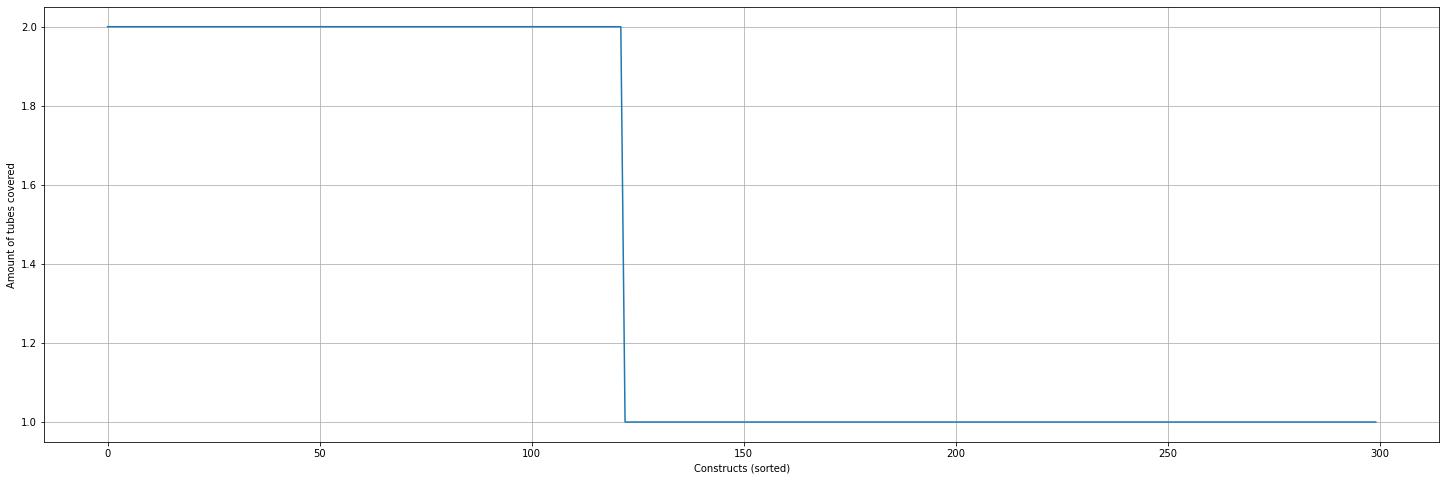

In [8]:
if data_quality_analysis:
    plot.tube_coverage_distribution(df=df_full)

### Plot the base coverage per construct distribution

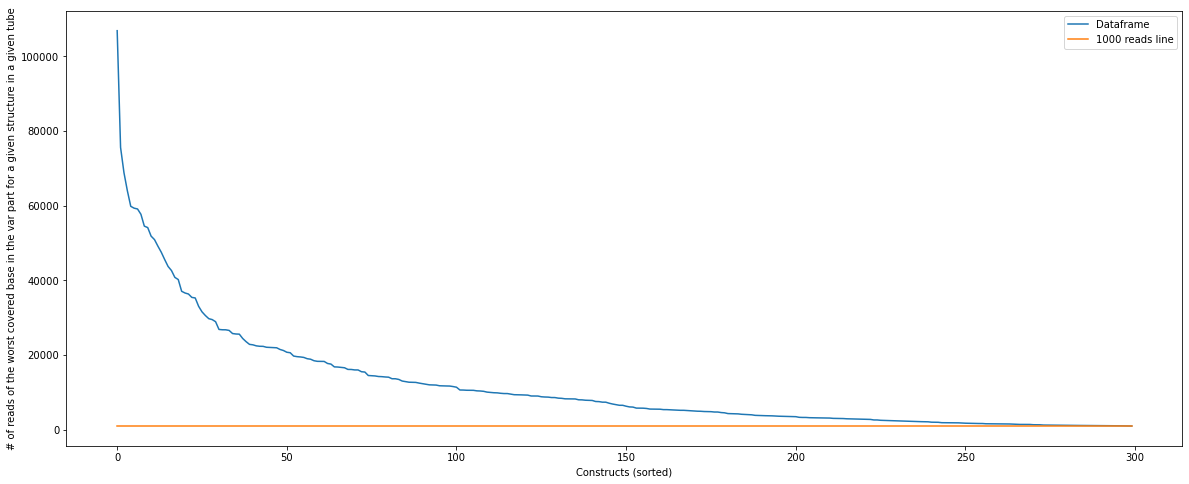

In [9]:
if data_quality_analysis:
    plot.base_coverage_for_all_constructs(df=df_full, 
                                      min_bases_cov=min_bases_cov)
print_num_reads = False
if print_num_reads:
    df.pivot('construct','tube','num_reads').to_csv('num_reads_realignment_v2.csv')

### Sanity-check construct-wise base coverage plots
Plot randomly picked sequences to check the quality of the data.

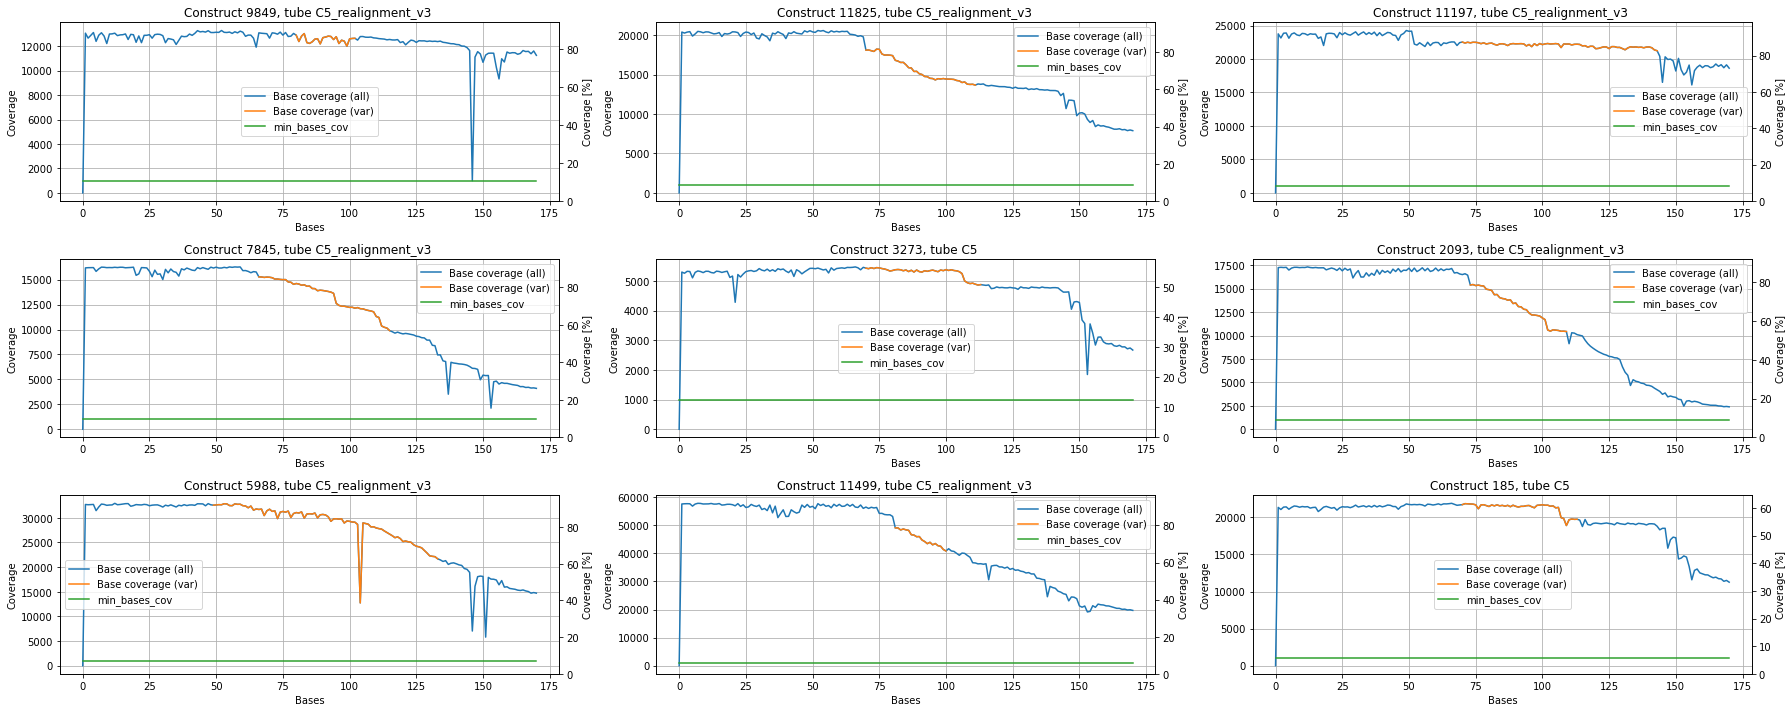

In [10]:
if data_quality_analysis:
    plot.random_base_coverage_plot_wise(df=df, 
                                    min_bases_cov=min_bases_cov)

### Heatmap of the var part coverage

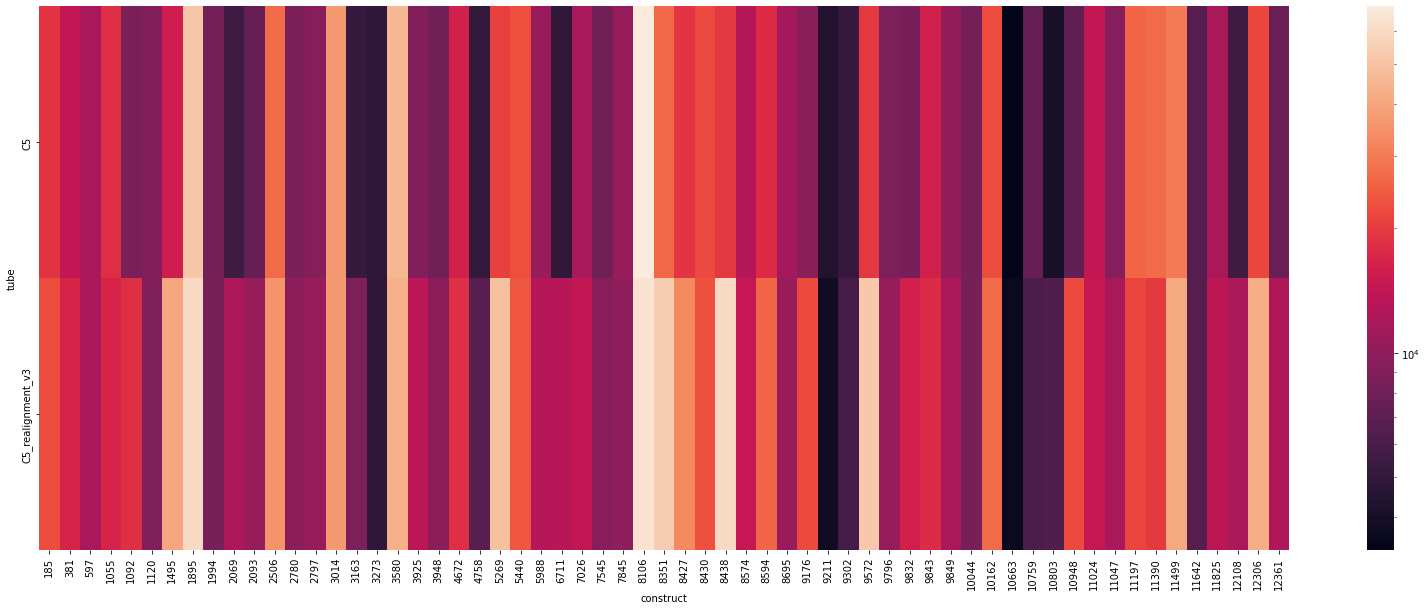

In [11]:
if data_quality_analysis:
    plot.heatmap(df = df, 
             column="cov_bases_var")

### Heatmap of the second half coverage

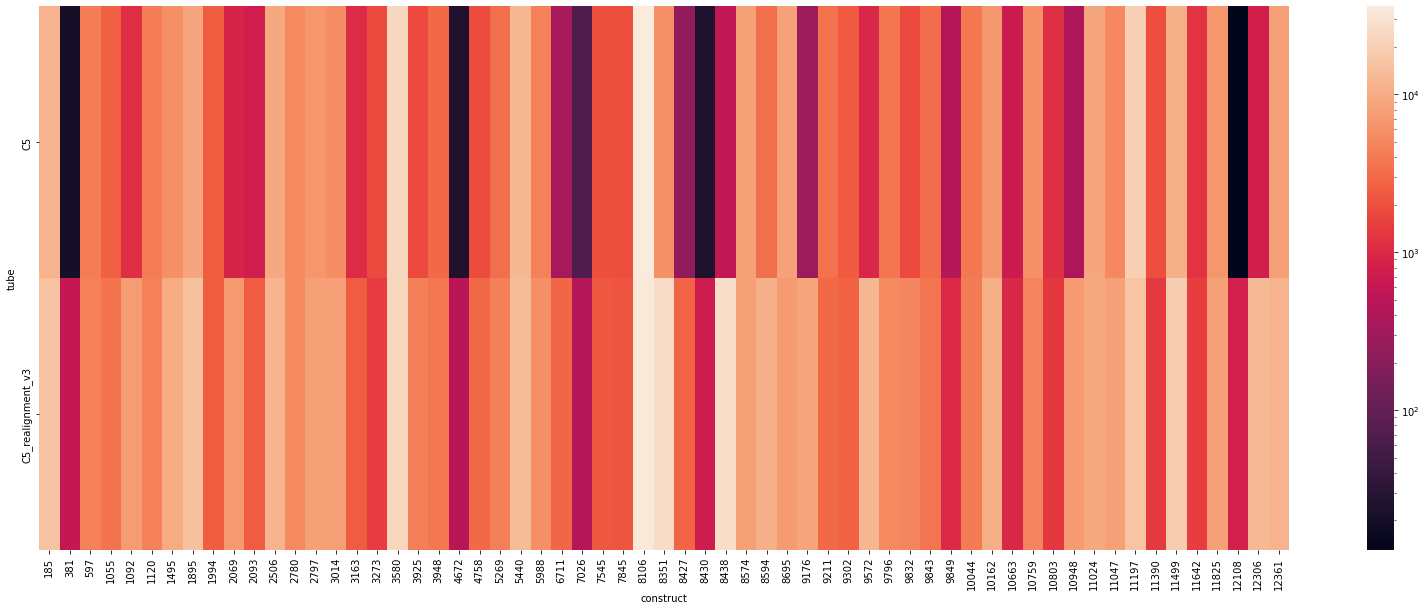

In [12]:
if data_quality_analysis:
    plot.heatmap(df = df, 
                column="cov_bases_sec_half")

# Data Analysis

### Define variables

In [13]:
### EDIT INPUTS HERE
study = 'C5_realignment_v3'  
show_plots = False
constructs = df.construct.unique()
analyse = {'base_per_base_partition':False,
           'base_per_base_sequence': True,
           'deltaG': True,
           'tube_comparison':False,
           'columns_csv': True,
           'deltaG_construct': True
            }
# END OF EDIT ZONE

tubes_per_study = {'replicates':['C5','A4' , 'F4', 'A6', 'A7'],
                      'salt': ['A6','B6','C6','D6','E6'], 
                      'temperature':['D7','E7','F7','G7','H7','A8','B8','C8'], 
                      'C5_diff_processings': list(filter(lambda p: 'C5' in p, pickles)),
                      'magnesium':['F6', 'G6', 'H6', 'A7', 'B7', 'C7'],
                      '60_mM_DMS_kinestics':['D8', 'E8', 'F8', 'G8', 'H8', 'A9'],
                      'C5_realignment_v3':['C5','C5_realignment_v3']
                      }

tubes = tubes_per_study[study]

### Big script to run every selected function

In [14]:
utils.big_script(df=df, tubes=tubes, constructs=constructs, analyse=analyse, study=study)

base per base and/or deltaG processing
C5 C5_realignment_v3 Push columns to csv
Push deltaG vs construct to csv


/home/ymdt/NAP/nap.py:489: RuntimeWarning: invalid value encountered in true_divide
  df_print['mut_rate'] = df_print.apply(lambda row: np.float32(np.array(row['mut_bases'])/np.array(row['info_bases'])), axis=1)


### Explore the data
`utils.get_var_info(df=df, tube=tube, construct=construct)` gives information about the variable part of the given construct of a given tube.

In [27]:
tube, construct = tubes[0], constructs[0]
#utils.get_var_info(df=df, tube=tube, construct=construct).xs((True, '0'),level=('paired','var_structure_comparison'))

### Mutation sequence-wise

`plot.mutation_rate(df, tube, construct, plot_type, index, normalize)` plots the mutation rate base-wise for a given construct of a given tube as a barplot. 
Arguments:
- `plot_type` :
    - `'sequence'` : each bar is colored w.r.t to the base of the original sequence.
    - `'partition'` : each bar shows the partition of into which bases this base mutates.
- `index`:
    - `'index'`: each base is identified with its position number
    - `'base'`: each base is identified with its type (A, C, G, T)

Partition type - non normalized

In [28]:
for tube in tubes:
    for construct in constructs:
        plot.mutation_rate(df, tube, construct, plot_type='partition', index='base')  
        plot.save_fig(path=f"data/figs/date/{study}/mut_per_base/partition/{construct}/", 
                    title=f"base_per_base_partition_{tube}_{construct}")
        plt.close(not show_plots)

Sequence type

In [ ]:
for tube in tubes:
    for construct in constructs:
        plot.mutation_rate(df=df,
                           tube=tube,
                           construct=construct,
                           plot_type='sequence',
                           index='index')
        plot.save_fig(path=f"data/figs/date/{study}/mut_per_base/sequence/{construct}/", 
                    title=f"base_per_base_sequence_{tube}_{construct}")
        plt.close(not show_plots)

### DeltaG plots

In [26]:
for tube in tubes:
    plot.deltaG(df=df, tube=tube)

    plot.save_fig(path=f"data/figs/date/{study}/deltaG/", 
             title=f"deltaG_{tube}")

    plt.close(not show_plots)

### Tubes comparison

In [ ]:
for construct in constructs:
        plot.compare_n_tubes(df, tubes, construct)
        plot.save_fig(path=f"data/figs/date/comparison/{study}", 
                      title=f"comparison_{study}_{construct}")
        plt.close(not show_plots)
        print(construct, end=' ')

### Save columns to a csv file

In [ ]:
utils.columns_to_csv(df=df,
                   tubes=tubes,
                   columns=['tube', 'construct','sequence','var_sequence','mut_bases','info_bases'],
                   title='seq_and_reactivity_{study}',
                   path='data/figs/date/{study}'
                   )

### Save construct vs deltaG 

In [ ]:

utils.deltaG_vs_construct_to_csv(df=df, title=f"deltaG_vs_construct.csv", path = f"data/figs/date/{study}", tubes=tubes)